In [2]:
import pandas as pd
import numpy as np

In [214]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import collections
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('stopwords')
nltk.downloader.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/justinkaufman/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/justinkaufman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/justinkaufman/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/justinkaufman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/justinkaufman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [215]:
df=pd.read_csv("lyrics-v5.csv")
df3=pd.read_csv("bts_song_features_224.csv")

In [216]:
df.head()

,id,album_title,eng_album_title,album_rd,album_seq,track_title,kor_track_title,eng_track_title,lyrics,hidden_track,remix,featured,performed_by,repackaged,lang,has_full_ver
0,0,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,1,Intro: 2 Cool 4 Skool (ft. DJ Friz),NaN,Intro: 2 Cool 4 Skool (ft. DJ Friz),we’re now going to progress to some steps\nwhi...,False,False,DJ Friz,RM,False,KOR,False
1,1,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,2,We Are Bulletproof Pt.2,NaN,We Are Bulletproof Pt.2,(what) give it to me\n (what) be nervous\n (wh...,False,False,NaN,BTS,False,KOR,False
2,2,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,3,Skit: Circle Room Talk,NaN,Skit: Circle Room Talk,rap monster: it was a big hit\nv: year 2006!\n...,False,False,NaN,BTS,False,KOR,False
3,3,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,4,No More Dream,NaN,No More Dream,"hey, what's your dream?\n hey, what’s your dre...",False,False,NaN,BTS,False,KOR,False
4,4,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,5,Interlude,NaN,Interlude,NaN,False,False,NaN,BTS,False,NaN,False


In [217]:
df.drop([7,8],inplace=True)
df.reset_index(inplace=True)
df.id = df.id.astype(float)
df.id[75]=81.5
df.sort_values(by=['id'],inplace=True)
df.drop([136,137,149],inplace=True)
df.reset_index(drop=True,inplace=True)
df.drop([172,180],inplace=True)
df.reset_index(inplace=True)
df.id[185]=191.5
df.sort_values(by=['id'],inplace=True)
df.id[213]=205.2
df.id[214]=205.3
df.id[215]=205.4
df.id[216]=205.5
df.id[217]=205.6
df.id[218]=205.7
df.id[219]=205.8
df.id[220]=205.9
df.sort_values(by=['id'],inplace=True)
df.reset_index(drop=True)
df.drop(columns=['level_0','index','id'],inplace=True)

/var/folders/d0/r5_rt10j15j98xny820n56kw0000gp/T/ipykernel_5507/878152620.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.id[75]=81.5
/var/folders/d0/r5_rt10j15j98xny820n56kw0000gp/T/ipykernel_5507/878152620.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.id[185]=191.5
/var/folders/d0/r5_rt10j15j98xny820n56kw0000gp/T/ipykernel_5507/878152620.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.id[213]=205.2
/var/folde

In [219]:
popular = df3.popularity
df_merged = pd.concat([df,popular], axis = 1)
df_merged.head()

,album_title,eng_album_title,album_rd,album_seq,track_title,kor_track_title,eng_track_title,lyrics,hidden_track,remix,featured,performed_by,repackaged,lang,has_full_ver,popularity
0,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,1,Intro: 2 Cool 4 Skool (ft. DJ Friz),NaN,Intro: 2 Cool 4 Skool (ft. DJ Friz),we’re now going to progress to some steps\nwhi...,False,False,DJ Friz,RM,False,KOR,False,51
1,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,2,We Are Bulletproof Pt.2,NaN,We Are Bulletproof Pt.2,(what) give it to me\n (what) be nervous\n (wh...,False,False,NaN,BTS,False,KOR,False,65
2,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,3,Skit: Circle Room Talk,NaN,Skit: Circle Room Talk,rap monster: it was a big hit\nv: year 2006!\n...,False,False,NaN,BTS,False,KOR,False,44
3,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,4,No More Dream,NaN,No More Dream,"hey, what's your dream?\n hey, what’s your dre...",False,False,NaN,BTS,False,KOR,False,66
4,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,5,Interlude,NaN,Interlude,NaN,False,False,NaN,BTS,False,NaN,False,51


In [223]:
df=df_merged

In [224]:
df = df[df['lyrics'].notna()]
df.reset_index(inplace=True)
df.drop(columns="index",inplace=True)
df.head()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,album_title,eng_album_title,album_rd,album_seq,track_title,kor_track_title,eng_track_title,lyrics,hidden_track,remix,featured,performed_by,repackaged,lang,has_full_ver,popularity
0,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,1,Intro: 2 Cool 4 Skool (ft. DJ Friz),NaN,Intro: 2 Cool 4 Skool (ft. DJ Friz),we’re now going to progress to some steps\nwhi...,False,False,DJ Friz,RM,False,KOR,False,51
1,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,2,We Are Bulletproof Pt.2,NaN,We Are Bulletproof Pt.2,(what) give it to me\n (what) be nervous\n (wh...,False,False,NaN,BTS,False,KOR,False,65
2,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,3,Skit: Circle Room Talk,NaN,Skit: Circle Room Talk,rap monster: it was a big hit\nv: year 2006!\n...,False,False,NaN,BTS,False,KOR,False,44
3,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,4,No More Dream,NaN,No More Dream,"hey, what's your dream?\n hey, what’s your dre...",False,False,NaN,BTS,False,KOR,False,66
4,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,6,좋아요 (I Like It),좋아요,I Like It,wanna be loved…\n\ndon’t wanna be fool wanna b...,False,False,NaN,BTS,False,KOR,False,74


In [225]:
sentiment_scores=[]
most_common_words=[]
allWords2=[]
for i in range(len(df.lyrics)):
    
    
    #VADER sentiment score 
    sia = SentimentIntensityAnalyzer()
    sentiment_scores.append(sia.polarity_scores(df.lyrics[i]))
    
    
    
    #lemmatizing - cutting words down to their roots

    wordnet_lemmatizer = WordNetLemmatizer()
    
    text = df.lyrics[i]
    text = text.replace(',',"")
    text = text.replace('(',"")
    text = text.replace(')',"")
    text = text.replace('\'',"")
    text = text.replace('’',"")
    text = text.replace('?',"")
    text = text.replace('*',"")
    text = text.replace('.',"")
    text = text.replace('!',"")
    
    allWords = nltk.tokenize.word_tokenize(text)
    
    for word in allWords:
        allWords2.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
    
    
    
    
    
    #finding most common words in lyrics
    #allWords = nltk.tokenize.word_tokenize(df.lyrics[i])
    allWordDist = nltk.FreqDist(w.lower() for w in allWords2)
    stopwords = nltk.corpus.stopwords.words('english')
    allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords2 if w not in stopwords)  
    
    


#     text_tokens = word_tokenize(text)

#     tokens_without_sw = [word for word in text_tokens if not word in stopwords]

    counter = collections.Counter(allWordExceptStopDist)
    
    top10=(counter.most_common()[1:11])
    
    most_common_words.append(top10)
    
    

In [226]:
df_senti=pd.DataFrame(sentiment_scores)
df_sentiment=df.join(df_senti)
df_common=pd.DataFrame(most_common_words)
df_final=df_sentiment.join(df_common)
df_final.drop(columns=["kor_track_title","album_title","hidden_track","featured","remix","repackaged","lang","has_full_ver","album_seq","track_title"],inplace=True)
df_final.head()

,eng_album_title,album_rd,eng_track_title,lyrics,performed_by,popularity,neg,neu,pos,compound,0,1,2,3,4,5,6,7,8,9
0,2 Cool 4 Skool,2013-06-12,Intro: 2 Cool 4 Skool (ft. DJ Friz),we’re now going to progress to some steps\nwhi...,RM,51,0.029,0.638,0.333,0.9719,"(cool, 8)","(4, 4)","(skool, 4)","(exclusive, 2)","(n, 2)","(teenagers, 2)","(10s, 2)","(20s, 2)","(let, 2)","(talk, 2)"
1,2 Cool 4 Skool,2013-06-12,We Are Bulletproof Pt.2,(what) give it to me\n (what) be nervous\n (wh...,BTS,65,0.083,0.797,0.121,0.9723,"(click, 16)","(bang, 16)","(bulletproof, 11)","(like, 11)","(sing, 10)","(2, 8)","(cool, 8)","(go, 7)","(much, 6)","(4, 4)"
2,2 Cool 4 Skool,2013-06-12,Skit: Circle Room Talk,rap monster: it was a big hit\nv: year 2006!\n...,BTS,44,0.093,0.769,0.138,0.9762,"(rap, 19)","(oh, 18)","(monster, 18)","(go, 16)","(click, 16)","(bang, 16)","(like, 16)","(bulletproof, 11)","(v, 11)","(jimin, 11)"
3,2 Cool 4 Skool,2013-06-12,No More Dream,"hey, what's your dream?\n hey, what’s your dre...",BTS,66,0.071,0.717,0.212,0.9965,"(dream, 41)","(la, 30)","(go, 23)","(dont, 19)","(rap, 19)","(oh, 18)","(monster, 18)","(click, 16)","(bang, 16)","(like, 16)"
4,2 Cool 4 Skool,2013-06-12,I Like It,wanna be loved…\n\ndon’t wanna be fool wanna b...,BTS,74,0.108,0.526,0.366,0.9996,"(dream, 41)","(dont, 30)","(la, 30)","(like, 29)","(go, 25)","(oh, 24)","(wan, 24)","(na, 24)","(yeah, 21)","(click, 19)"


In [227]:
df_final[50:100]

,eng_album_title,album_rd,eng_track_title,lyrics,performed_by,popularity,neg,neu,pos,compound,0,1,2,3,4,5,6,7,8,9
50,The Most Beautiful Moment In Life Pt.1,2015-04-24,Intro: The Most Beautiful Moment In Life,the rim looks farther away today\nsighs are bu...,SUGA,53,0.158,0.686,0.156,-0.1333,"(im, 279)","(go, 234)","(like, 231)","(dont, 199)","(youre, 194)","(let, 176)","(know, 161)","(get, 142)","(say, 135)","(want, 132)"
51,The Most Beautiful Moment In Life Pt.1,2015-04-24,I NEED U,"fall fall fall, scattering apart\nfall fall fa...",BTS,70,0.156,0.676,0.168,0.9506,"(im, 285)","(go, 239)","(like, 232)","(youre, 205)","(dont, 202)","(let, 176)","(know, 164)","(get, 145)","(say, 138)","(want, 133)"
52,The Most Beautiful Moment In Life Pt.1,2015-04-24,Hold Me Tight,i empty my drink but it gets filled with lonel...,BTS,65,0.138,0.599,0.263,0.9982,"(im, 294)","(go, 241)","(like, 236)","(youre, 208)","(dont, 204)","(let, 177)","(know, 166)","(get, 146)","(say, 138)","(want, 134)"
53,The Most Beautiful Moment In Life Pt.1,2015-04-24,DOPE,"welcome, it's your first time with bts, isn't ...",BTS,71,0.128,0.705,0.167,0.9266,"(im, 298)","(go, 242)","(like, 238)","(dont, 211)","(youre, 210)","(let, 177)","(know, 167)","(get, 158)","(say, 146)","(want, 134)"
54,The Most Beautiful Moment In Life Pt.1,2015-04-24,Boyz With Fun,"we’re here, the fun boys\nhere, here, the fun ...",BTS,66,0.087,0.666,0.247,0.9985,"(la, 303)","(go, 250)","(like, 241)","(dont, 224)","(youre, 214)","(let, 179)","(know, 174)","(get, 160)","(say, 147)","(want, 134)"
55,The Most Beautiful Moment In Life Pt.1,2015-04-24,Converse High,your converse high\nyour converse high\nyour c...,BTS,62,0.045,0.788,0.167,0.9927,"(la, 303)","(go, 252)","(like, 250)","(dont, 228)","(youre, 214)","(let, 179)","(know, 177)","(get, 160)","(say, 149)","(want, 138)"
56,The Most Beautiful Moment In Life Pt.1,2015-04-24,Moving On,ayo suga\ni remember how we came here three ye...,BTS,58,0.078,0.782,0.140,0.9931,"(la, 303)","(like, 254)","(go, 253)","(dont, 228)","(youre, 215)","(let, 192)","(know, 178)","(get, 161)","(say, 151)","(want, 138)"
57,The Most Beautiful Moment In Life Pt.1,2015-04-24,Outro: Love is Not Over,that long night seems to be only flowing as it...,JUNGKOOK; V; JIMIN; JIN,56,0.165,0.578,0.258,0.9740,"(la, 303)","(like, 254)","(go, 253)","(dont, 230)","(youre, 216)","(let, 192)","(know, 178)","(get, 162)","(say, 151)","(want, 138)"
58,The Most Beautiful Moment In Life Pt.2,2015-09-30,INTRO : Never Mind,i only look forward and run\nwithout having ti...,RM; SUGA; J-HOPE,54,0.173,0.731,0.096,-0.9875,"(la, 303)","(go, 261)","(like, 260)","(dont, 234)","(youre, 221)","(let, 192)","(know, 178)","(get, 162)","(say, 155)","(want, 140)"
59,The Most Beautiful Moment In Life Pt.2,2015-09-30,Run,"you’re my sun, the one and only in this world\...",BTS,68,0.145,0.674,0.181,0.9593,"(la, 303)","(go, 261)","(like, 261)","(dont, 242)","(youre, 222)","(let, 195)","(know, 181)","(get, 166)","(say, 156)","(want, 140)"


# Scratch work

In [32]:
'''
nltk pretrained sentiment analyzer called VALER. Not very good at long compound sentences 
and better for short "social media" posts


shows how negative, positive, the lyrics are 
'''

sia = SentimentIntensityAnalyzer()
sia.polarity_scores(df.lyrics[1])

{'neg': 0.083, 'neu': 0.797, 'pos': 0.121, 'compound': 0.9723}

In [33]:
allWords = nltk.tokenize.word_tokenize(df.lyrics[1])
allWordDist = nltk.FreqDist(w.lower() for w in allWords)
stopwords = nltk.corpus.stopwords.words('english')
allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords)  

In [37]:
mostCommon= allWordDist.most_common(10)
mostCommon2= allWordExceptStopDist.most_common(10)

In [35]:
mostCommon #need to get rid of stop words

[(',', 27),
 ('i', 25),
 ('we', 23),
 ('(', 22),
 (')', 22),
 ('it', 17),
 ('oh', 16),
 ('click', 16),
 ('bang', 16),
 ('’', 14)]

In [38]:
mostCommon2

[(',', 27),
 ('(', 22),
 (')', 22),
 ('oh', 16),
 ('click', 16),
 ('bang', 16),
 ('’', 14),
 ('like', 11),
 ('bulletproof', 10),
 ('sing', 9)]

In [64]:
text = df.lyrics[1]
text = text.replace(',',"")
text = text.replace('(',"")
text = text.replace(')',"")
text = text.replace('\'',"")
text = text.replace('’',"")
text = text.replace('?',"")


text_tokens = word_tokenize(text)

text_tokens

tokens_without_sw = [word for word in text_tokens if not word in stopwords]

print(tokens_without_sw)

['give', 'nervous', 'one', 'end', 'bulletproof', 'bulletproof', 'bulletproof', 'name', 'jungkook', 'scale', 'nationwide', 'pulled', 'all-nighters', 'practice', 'rooms', 'instead', 'school', 'dancing', 'singing', 'guys', 'partied', 'gave', 'sleep', 'dreams', 'spent', 'night', 'holding', 'pen', 'closing', 'eyes', 'morning', 'sun', 'rises', 'limit', 'broken', 'double', 'standards', 'many', 'oppositions', 'got', 'lucky', 'contacted', 'agency', 'yall', 'called', 'rappers', 'cant', 'sing', 'rapper', 'title', 'extravagance', 'everywhere', 'go', 'everything', 'show', 'much', 'sharpened', 'sword', 'people', 'looked', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'hey', 'shout', 'oh', '!', 'throw', 'stone', 'youve', 'done', 'much', 'go', 'hard', 'fear', 'click', 'click', 'bang', 'bang', 'sing', 'like', 'click', 'click', 'bang', 'bang', 'sing', 'like', 'oh', '!', 'throw', 'stone', 'youve', 'done', 'much', 'go', 'hard', 'fear', 'click', 'click', 'bang', 'bang', 'sing', 'like', 'click', 'click', 'bang', 'ban

In [49]:
# counter = collections.Counter(tokens_without_sw)
# print(counter.most_common())

[('oh', 16), ('click', 16), ('bang', 16), ('like', 11), ('bulletproof', 10), ('sing', 9), ('go', 6), ('much', 6), ('!', 4), ('throw', 4), ('stone', 4), ('youve', 4), ('done', 4), ('hard', 4), ('fear', 4), ('give', 3), ('nervous', 3), ('guys', 2), ('rapper', 2), ('everywhere', 2), ('everything', 2), ('show', 2), ('sharpened', 2), ('sword', 2), ('people', 2), ('looked', 2), ('hey', 2), ('shout', 2), ('look', 2), ('nothing', 2), ('still', 2), ('monster', 2), ('impossible', 2), ('jungkook', 1), ('scale', 1), ('nationwide', 1), ('pulled', 1), ('all-nighters', 1), ('practice', 1), ('rooms', 1), ('instead', 1), ('school', 1), ('dancing', 1), ('singing', 1), ('partied', 1), ('gave', 1), ('sleep', 1), ('dreams', 1), ('spent', 1), ('night', 1), ('holding', 1), ('pen', 1), ('closing', 1), ('eyes', 1), ('morning', 1), ('sun', 1), ('rises', 1), ('limit', 1), ('broken', 1), ('double', 1), ('standards', 1), ('many', 1), ('oppositions', 1), ('got', 1), ('lucky', 1), ('contacted', 1), ('agency', 1), ('

In [50]:
top10=(counter.most_common()[1:10])

In [51]:
top10_df=pd.DataFrame(top10)
top10_df
top10_df.rename(columns={0: "word", 1: "frequency"},inplace=True)

<BarContainer object of 9 artists>

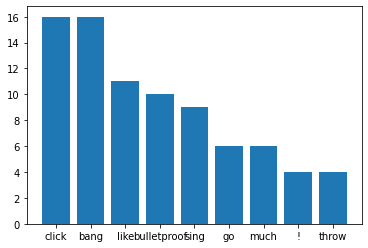

In [52]:
plt.bar(top10_df.word,top10_df.frequency)

In [28]:
df2=pd.read_csv("updated_Spotify_BTS_AudioFeatures.csv")
df2.head()

,Unnamed: 0,Index,Title,Artist,Release,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,popularity
0,0,1,Like,BTS,2013/6/12,0.582,0.726,0,-4.174,0,0.1160,0.27100,0.000000,0.227,0.768,100.450,1HQHuPpr2s2z3VIBTLtUmv,231883,34
1,1,2,No More Dream,BTS,2013/6/12,0.436,0.869,2,-5.174,1,0.4720,0.01240,0.000002,0.494,0.612,167.766,4frlkLwlnm58ejpNwWjxyl,221593,32
2,2,3,We Are Bulletproof Pt.2,BTS,2013/6/12,0.754,0.952,8,-5.110,0,0.1530,0.00945,0.000006,0.189,0.868,144.051,2Kspa0jD2MSkaEdonf4Cnb,225360,31
3,3,4,Attack on Bangtan,BTS,2013/9/11,0.722,0.961,11,-2.548,0,0.2670,0.20300,0.000000,0.121,0.678,118.016,6bCoSWW1zyQrwQDSMEmsVy,247160,8
4,4,5,Coffee,BTS,2013/9/11,0.652,0.794,0,-6.604,1,0.0957,0.00808,0.000000,0.298,0.545,92.045,0Tb8sBQ9fseZbDRzRSxTdi,261453,10


In [12]:
df3=pd.read_csv("bts_song_features_224.csv")
df3.head(20)

,Unnamed: 0,id,name,popularity
0,0,1UlnDZ5ubsSX3xrXu063dZ,Intro: 2 Cool 4 Skool,51
1,1,5pjHS3EpHurMyIpB2QBnEd,We Are Bulletproof Pt.2,65
2,2,4Ut6UU8Yyihz1jCZWSCQpu,Skit: Circle Room Talk,44
3,3,089PFeXotzDLNQz9NCk6pF,No More Dream,66
4,4,2QVXLAI2Io3tDmhFOSumr0,Interlude,51
5,5,55Ctj6nVfobn9AcPe6sLG2,Like,74
6,6,1GPIdEcxPjPIYGmN08b1yf,Outro: Circle Room Cypher,47
7,7,3FdanLGasOj37Xi316GfZ4,"Intro: O!RUL8,2?",51
8,8,7JosxtkCqIQieNWXA2Dj3v,N.O,60
9,9,29vOLabxvytbI8fX9xgTaD,We On,56


In [211]:
df=pd.read_csv("lyrics-v5.csv")

In [212]:
df.drop([7,8],inplace=True)
df.reset_index(inplace=True)
df.id = df.id.astype(float)
df.id[75]=81.5
df.sort_values(by=['id'],inplace=True)
df.drop([136,137,149],inplace=True)
df.reset_index(drop=True,inplace=True)
df.drop([172,180],inplace=True)
df.reset_index(inplace=True)
df.id[185]=191.5
df.sort_values(by=['id'],inplace=True)
df.id[213]=205.2
df.id[214]=205.3
df.id[215]=205.4
df.id[216]=205.5
df.id[217]=205.6
df.id[218]=205.7
df.id[219]=205.8
df.id[220]=205.9
df.sort_values(by=['id'],inplace=True)
df.reset_index(drop=True)
df.drop(columns=['level_0','index','id'],inplace=True)

/var/folders/d0/r5_rt10j15j98xny820n56kw0000gp/T/ipykernel_5507/878152620.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.id[75]=81.5
/var/folders/d0/r5_rt10j15j98xny820n56kw0000gp/T/ipykernel_5507/878152620.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.id[185]=191.5
/var/folders/d0/r5_rt10j15j98xny820n56kw0000gp/T/ipykernel_5507/878152620.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.id[213]=205.2
/var/folde

In [213]:
popular = df3.popularity
df_merged = pd.concat([df,popular], axis = 1)
df_merged.head()

,album_title,eng_album_title,album_rd,album_seq,track_title,kor_track_title,eng_track_title,lyrics,hidden_track,remix,featured,performed_by,repackaged,lang,has_full_ver,popularity
0,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,1,Intro: 2 Cool 4 Skool (ft. DJ Friz),NaN,Intro: 2 Cool 4 Skool (ft. DJ Friz),we’re now going to progress to some steps\nwhi...,False,False,DJ Friz,RM,False,KOR,False,51
1,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,2,We Are Bulletproof Pt.2,NaN,We Are Bulletproof Pt.2,(what) give it to me\n (what) be nervous\n (wh...,False,False,NaN,BTS,False,KOR,False,65
2,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,3,Skit: Circle Room Talk,NaN,Skit: Circle Room Talk,rap monster: it was a big hit\nv: year 2006!\n...,False,False,NaN,BTS,False,KOR,False,44
3,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,4,No More Dream,NaN,No More Dream,"hey, what's your dream?\n hey, what’s your dre...",False,False,NaN,BTS,False,KOR,False,66
4,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,5,Interlude,NaN,Interlude,NaN,False,False,NaN,BTS,False,NaN,False,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,"Butter (Hotter, Sweeter, Cooler) - EP",NaN,2021-06-04,1,Butter,NaN,Butter,Smooth like butter\nLike a criminal undercover...,False,False,NaN,BTS,False,ENG,False,86
220,"Butter (Hotter, Sweeter, Cooler) - EP",NaN,2021-06-04,2,Butter (Hotter Remix),NaN,Butter (Hotter Remix),Smooth like butter\nLike a criminal undercover...,False,False,NaN,BTS,False,ENG,False,61
221,"Butter (Hotter, Sweeter, Cooler) - EP",NaN,2021-06-04,3,Butter (Sweeter Remix),NaN,Butter (Sweeter Remix),Smooth like butter\nLike a criminal undercover...,False,False,NaN,BTS,False,ENG,False,59
222,"Butter (Hotter, Sweeter, Cooler) - EP",NaN,2021-06-04,4,Butter (Cooler Remix),NaN,Butter (Cooler Remix),Smooth like butter\nLike a criminal undercover...,False,False,NaN,BTS,False,ENG,False,60


In [29]:
df_merged = df.merge(df3, left_on=['eng_track_title'], right_on=['name'])
df_merged.head()

,id_x,album_title,eng_album_title,album_rd,album_seq,track_title,kor_track_title,eng_track_title,lyrics,hidden_track,remix,featured,performed_by,repackaged,lang,has_full_ver,Unnamed: 0,id_y,name,popularity
0,1,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,2,We Are Bulletproof Pt.2,NaN,We Are Bulletproof Pt.2,(what) give it to me\n (what) be nervous\n (wh...,False,False,NaN,BTS,False,KOR,False,1,5pjHS3EpHurMyIpB2QBnEd,We Are Bulletproof Pt.2,65
1,2,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,3,Skit: Circle Room Talk,NaN,Skit: Circle Room Talk,rap monster: it was a big hit\nv: year 2006!\n...,False,False,NaN,BTS,False,KOR,False,2,4Ut6UU8Yyihz1jCZWSCQpu,Skit: Circle Room Talk,44
2,3,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,4,No More Dream,NaN,No More Dream,"hey, what's your dream?\n hey, what’s your dre...",False,False,NaN,BTS,False,KOR,False,3,089PFeXotzDLNQz9NCk6pF,No More Dream,66
3,4,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,5,Interlude,NaN,Interlude,NaN,False,False,NaN,BTS,False,NaN,False,4,2QVXLAI2Io3tDmhFOSumr0,Interlude,51
4,6,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,7,Outro: Circle Room Cypher,NaN,Outro: Circle Room Cypher,"hurry up, hurry-hurry-hurry-hurry-hurry-hurry-...",False,False,NaN,BTS,False,KOR,False,6,1GPIdEcxPjPIYGmN08b1yf,Outro: Circle Room Cypher,47


In [30]:
df_merged.shape

(77, 20)

In [ ]:
test=df.lyrics[1]
wordnet_lemmatizer = WordNetLemmatizer()


text = test
text = text.replace(',',"")
text = text.replace('(',"")
text = text.replace(')',"")
text = text.replace('\'',"")
text = text.replace('’',"")
text = text.replace('?',"")
text = text.replace('*',"")
text = text.replace('.',"")
text = text.replace('!',"")

allWords = nltk.tokenize.word_tokenize(text)


allWords2=[]

for word in allWords:
    #print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word, pos="v")))
    allWords2.append(wordnet_lemmatizer.lemmatize(word, pos="v"))